In [1]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Import data into a numpy array
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

In [2]:
#Initialize a variable as the Guassian Naive Bayes classifier and fit it with the data
gnb = GaussianNB()
gnb.fit(X, Y)
GaussianNB()

# Predict a few instances
print(gnb.predict([[-0.8, -1]]))
gnb_pf = GaussianNB()
gnb_pf.partial_fit(X, Y, np.unique(Y))
GaussianNB()
print(gnb_pf.predict([[-0.8, -1]]))

[1]
[1]


In [7]:
import pandas as pd 

column_names = ['col' + str(x) for x in range(58)]

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', names=column_names)
data.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [8]:
data.shape

(4601, 58)

In [9]:
y = data['col57']
x = data.drop(['col54', 'col55', 'col56', 'col57'], axis=1)

In [12]:
x.isnull().any()

col0     False
col1     False
col2     False
col3     False
col4     False
col5     False
col6     False
col7     False
col8     False
col9     False
col10    False
col11    False
col12    False
col13    False
col14    False
col15    False
col16    False
col17    False
col18    False
col19    False
col20    False
col21    False
col22    False
col23    False
col24    False
col25    False
col26    False
col27    False
col28    False
col29    False
col30    False
col31    False
col32    False
col33    False
col34    False
col35    False
col36    False
col37    False
col38    False
col39    False
col40    False
col41    False
col42    False
col43    False
col44    False
col45    False
col46    False
col47    False
col48    False
col49    False
col50    False
col51    False
col52    False
col53    False
dtype: bool

In [13]:
y.isnull().any()

False

In [14]:
for col in x.columns:
    if x[col].max() > 100.0:
        print col

In [15]:
for col in x.columns:
    x[col] = x[col] * 0.01

In [18]:
for col in x.columns:
    if x[col].max() > 1.0:
        print col

In [10]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

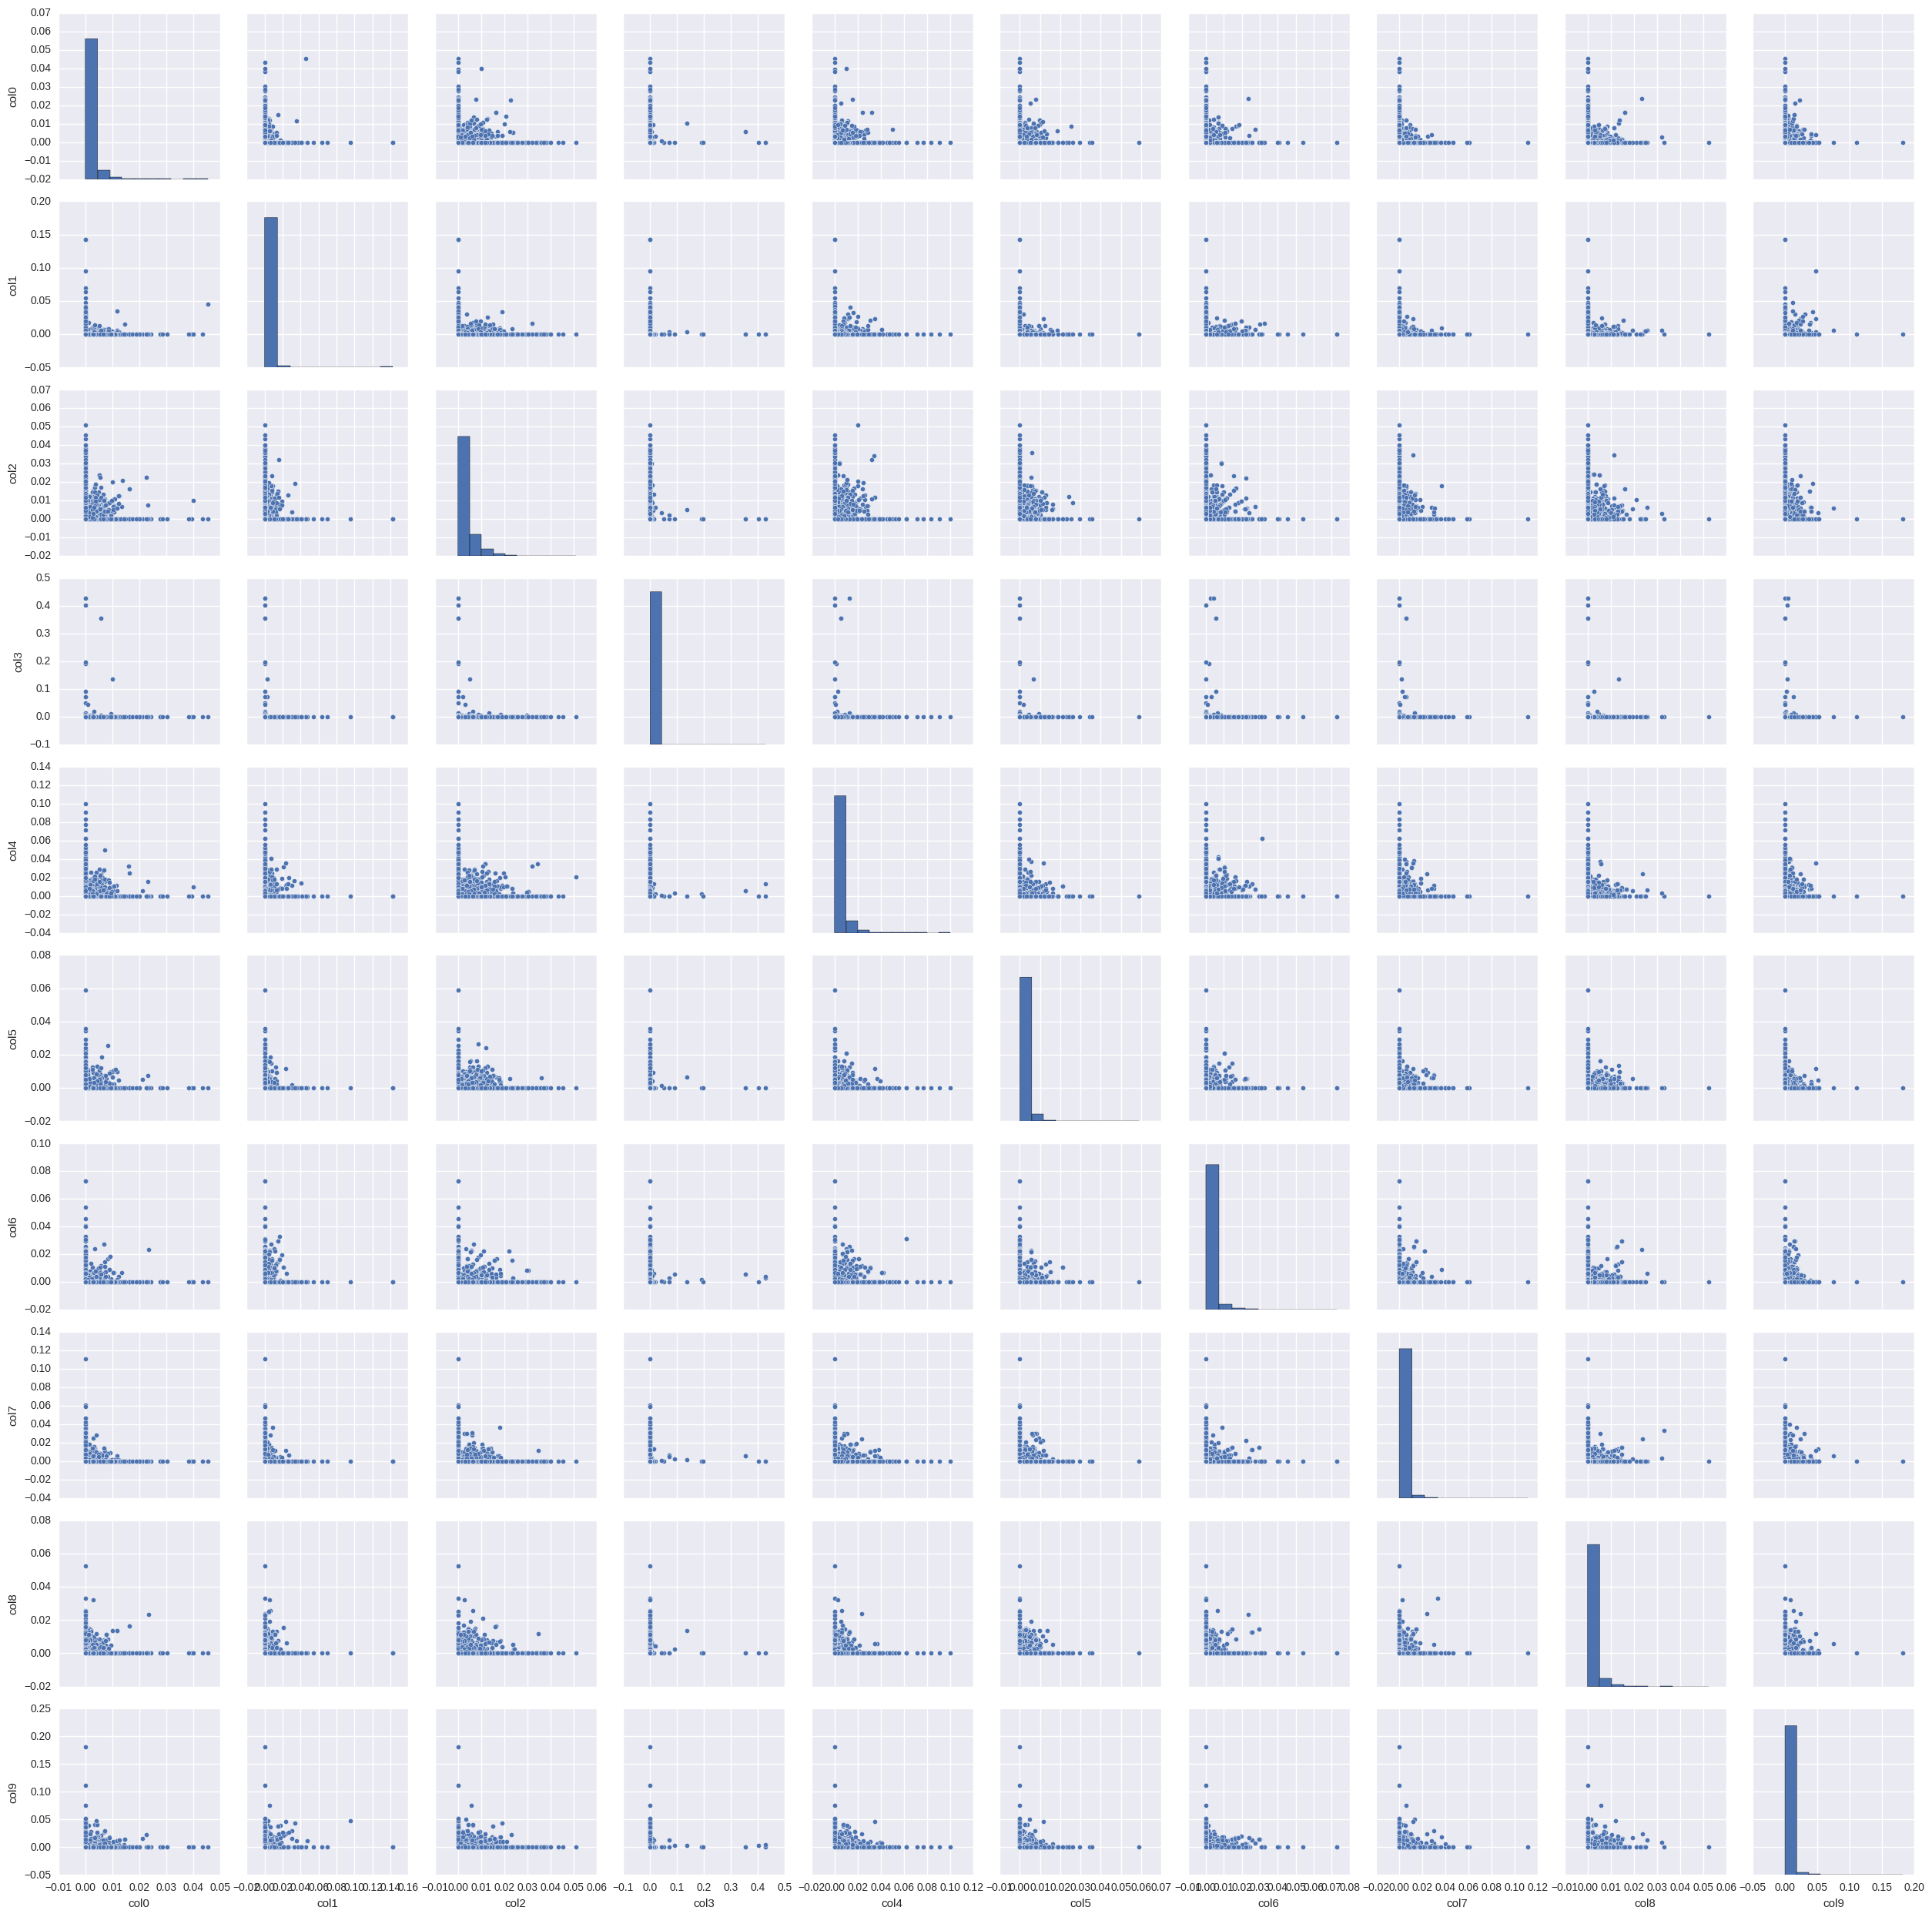

In [20]:
sns.pairplot(x.iloc[:, 0:10])

In [21]:
y.value_counts()

0    2788
1    1813
Name: col57, dtype: int64

In [22]:
mnb = MultinomialNB()
mnb.fit(x, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
mnb.score(x, y)

0.60725929145837865

In [25]:
y_pred = mnb.predict(x)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print classification_report(y, y_pred)

             precision    recall  f1-score   support

          0       0.61      1.00      0.76      2788
          1       1.00      0.00      0.01      1813

avg / total       0.76      0.61      0.46      4601



In [28]:
print confusion_matrix(y, y_pred)

[[2788    0]
 [1807    6]]


In [29]:
predicted_probabilities = mnb.predict_proba(x)
predicted_probabilities[0:5]

array([[ 0.59517944,  0.40482056],
       [ 0.58725293,  0.41274707],
       [ 0.5812276 ,  0.4187724 ],
       [ 0.59391899,  0.40608101],
       [ 0.59392318,  0.40607682]])

In [30]:
print predicted_probabilities[:,0].mean()

0.610864931348


In [31]:
print predicted_probabilities[:,0].min()

0.414242985375


In [32]:
print predicted_probabilities[:,0].max()

0.821778411309


In [33]:
np.median(predicted_probabilities[:,0])

0.60473994536577391

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier()

In [37]:
rfc.fit(x, y)
prediction = rfc.predict(x)
rfc.score(x, y)

0.99543577483155832

In [38]:
from sklearn.cross_validation import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [40]:
print x_train.shape
print y_train.shape
print x_test.shape
print y_test.shape

(3450, 54)
(3450,)
(1151, 54)
(1151,)


In [41]:
mnb.fit(x_train, y_train)
mnb.score(x_train, y_train)

0.61043478260869566

In [42]:
mnb.score(x_test, y_test)

0.59687228496959166

In [44]:
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train)

0.9956521739130435

In [45]:
rfc.score(x_test, y_test)

0.92788879235447441

In [47]:
gnb = GaussianNB()
gnb.fit(x, y)
gnb.score(x_train, y_train)

0.8121739130434783

In [48]:
gnb.score(x_test, y_test)

0.82189400521285838

In [49]:
confusion_matrix(y_test, rfc.predict(x_test))

array([[656,  29],
       [ 54, 412]])

In [50]:
confusion_matrix(y_test, gnb.predict(x_test))

array([[495, 190],
       [ 15, 451]])

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lm = LogisticRegression()

In [53]:
lm.fit(x_train, y_train)
lm.score(x_train, y_train)

0.61449275362318845

In [54]:
lm.score(x_test, y_test)

0.60034752389226764

In [55]:
confusion_matrix(y_test, lm.predict(x_test))

array([[677,   8],
       [452,  14]])